## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Sept 17, 2018 11:59pm EST</center>

#### Note that this is an individual homework to be completed without collaborations except through Piazza.  

#### We encourage you to make progress this weekend since the second homework will likely come out in a week before this one is due.



### Your name:

PAUL M. WASHBURN

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
%matplotlib inline
from functools import wraps
import time
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

def timing_function(some_function):
    '''
    Decorator function.  Outputs the time a function takes to execute.
    '''
    @wraps(some_function)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = some_function(*args, **kwargs)
        t2 = time.time()
        time_elapsed = round((t2 - t1), 2)
        print('Runtime: ' + str(time_elapsed) + ' seconds')
        return result
    
    return wrapper

### Problem 1   (5 points)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
2 & 1 & 2  
\end{array}\right]
$$

Compute XY<sup>T</sup>.  The answer can be computed by hand and written in Markdown like the above matrices, or computed in python.  Either way is acceptable.

In [4]:
X = np.arange(1, 10).reshape(3, 3)
Y = np.array([[1, 2, 1], [2, 1, 2]])
np.matmul(X, Y.T)

array([[ 8, 10],
       [20, 25],
       [32, 40]])

In [5]:
np.dot(X, Y.T)

array([[ 8, 10],
       [20, 25],
       [32, 40]])

### Problem 2  

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.

In [6]:
# read data from source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
colnames = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'target']
df = pd.read_fwf(url, header=None)
df.columns = colnames
print(df.head())

# download
df.to_csv('data/ecoli_data.csv', index=False)

  sequence_name   mcg   gvh   lip  chg   aac  alm1  alm2 target
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35     cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44     cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46     cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36     cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35     cp


In [7]:
# load
df = pd.read_csv('data/ecoli_data.csv')

# describe dimensions
print('rows = %i, columns = %i' %(df.shape[0], df.shape[1]))

# first five 
df.head()

rows = 336, columns = 9


,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


### Problem 2b  (10 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / N 


In [8]:
def cov_xy(m, y):
    '''
    Input vectors as 1D arrays
    '''
    X = np.concatenate((m[:,np.newaxis], y[:,np.newaxis]), axis=1)
    N = X.shape[0] - 1
    X -= X.mean(axis=0)
    C = (np.dot(X.T, X.conj()) / N).squeeze()
    return C

def cov_matrix(df, cols):
    '''
    Returns covariance matrix with column names
    '''
    # create empty dataframe with variance on the diagonals
    # while preserving names -- leverages pd.DataFrame object
    # df.var() method
    cov_df = pd.DataFrame(np.diag(df[cols].var()), columns=cols, index=cols)

    # populate cov_df empty dataframe with covariances
    for X in cols:
        for Y in cols:
            # we already have the variances, so ignore when X == Y
            if X != Y:
                # populate empty dataframe with symmetrical value
                # that is off the diagonal
                _cov = cov_xy(df[X], df[Y])[0, 1]
                cov_df.loc[Y, X] =  _cov
            else:
                pass
    return cov_df

cols = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']
C = cov_matrix(df, cols)
C

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
gvh,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
lip,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
chg,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
aac,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
alm1,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
alm2,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


In [9]:
# make sure above is correct
pd.DataFrame(np.cov(df[cols].T), columns=cols, index=cols)

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
gvh,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
lip,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
chg,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
aac,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
alm1,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
alm2,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


In [10]:
# double-check to make sure above is correct
print(np.allclose(cov_matrix(df, cols), df[cols].cov()))
print(np.allclose(cov_matrix(df, cols), np.cov(df[cols].T)))

True
True


### Problem 2c  (10 points).

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.

In [11]:
u, s, v = np.linalg.svd(C)
print('u = ', u, '\n')
print('s = ', s, '\n')
print('v = ', v, '\n')
print('Note same as covariance matrix:')
pd.DataFrame(np.dot(u, np.dot(np.diag(s), v)))

u =  [[-3.41720629e-01 -7.29824958e-01  4.56914809e-01  3.52555665e-01
  -1.29441525e-01  2.62199804e-02 -8.56193962e-03]
 [-9.17492644e-02 -5.28794379e-01 -7.04480258e-01 -3.42514767e-01
  -1.39018617e-01  2.81111220e-01  2.89703065e-04]
 [-1.99698823e-02 -7.25012267e-02  9.24097367e-02 -1.46705018e-02
   8.54762221e-01  4.93627297e-01 -1.06318528e-01]
 [ 9.74209562e-04 -1.16809378e-02  8.81896510e-03  1.64849996e-02
   8.61437517e-02  6.21081678e-02  9.94100049e-01]
 [-1.47115119e-01 -4.80496808e-02  4.70463079e-01 -8.66343630e-01
  -4.86492931e-02 -3.90505852e-02  1.64278490e-02]
 [-6.89914858e-01  7.21275410e-02 -2.54072739e-01 -1.83906883e-02
   3.50569568e-01 -5.75266798e-01  9.64476070e-03]
 [-6.13827312e-01  4.18124394e-01  2.07514962e-02  8.37356323e-02
  -3.17196689e-01  5.83358230e-01 -5.01770938e-03]] 

s =  [0.08970253 0.04243901 0.01463252 0.01288363 0.00853362 0.00493527
 0.00065892] 

v =  [[-3.41720629e-01 -9.17492644e-02 -1.99698823e-02  9.74209562e-04
  -1.47115119e-

,0,1,2,3,4,5,6
0,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
1,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
2,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
3,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
4,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
5,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
6,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


### Problem 2d  (10 points)

Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.

In [13]:
# subtract mean
cols = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']
df_0 = df[cols] - df[cols].mean(axis=0)

# get covariance matrix
C = cov_matrix(df_0, cols)

assert np.linalg.det(C) >= 0 

eigenvalues, eigenvectors = np.linalg.eigh(C)
print('Eigenvalues \n%s\n' %eigenvalues)
print('Eigenvectors \n%s\n' %eigenvectors)

# eigenvectors orthonormal
print('np.dot(eigenvectors[1], eigenvectors[0]) = \n', 
      np.dot(eigenvectors[0], eigenvectors[1]), '\n')

for vec in eigenvectors:
    assert np.allclose(1, np.linalg.norm(vec))
#print(eigenvectors[:,1])

# sort eigenvalues in desc order
idx = np.argsort (-eigenvalues)
eigenvalues = eigenvalues [ idx ]
eigenvectors = eigenvectors [: , idx ]

print('eigenvalues = \n', eigenvalues, '\n')
print('sorted idx = ', idx, '\n')
print('sorted eigenvectors = ', eigenvectors, '\n')

print('eigenvectors[:,0] = ', eigenvectors[:,0])
print('eigenvectors[:,1] = ', eigenvectors[:,1])

Eigenvalues 
[0.00065892 0.00493527 0.00853362 0.01288363 0.01463252 0.04243901
 0.08970253]

Eigenvectors 
[[-8.56193962e-03  2.62199804e-02 -1.29441525e-01  3.52555665e-01
   4.56914809e-01 -7.29824958e-01 -3.41720629e-01]
 [ 2.89703065e-04  2.81111220e-01 -1.39018617e-01 -3.42514767e-01
  -7.04480258e-01 -5.28794379e-01 -9.17492644e-02]
 [-1.06318528e-01  4.93627297e-01  8.54762221e-01 -1.46705018e-02
   9.24097367e-02 -7.25012267e-02 -1.99698823e-02]
 [ 9.94100049e-01  6.21081678e-02  8.61437517e-02  1.64849996e-02
   8.81896510e-03 -1.16809378e-02  9.74209562e-04]
 [ 1.64278490e-02 -3.90505852e-02 -4.86492931e-02 -8.66343630e-01
   4.70463079e-01 -4.80496808e-02 -1.47115119e-01]
 [ 9.64476070e-03 -5.75266798e-01  3.50569568e-01 -1.83906883e-02
  -2.54072739e-01  7.21275410e-02 -6.89914858e-01]
 [-5.01770938e-03  5.83358230e-01 -3.17196689e-01  8.37356323e-02
   2.07514962e-02  4.18124394e-01 -6.13827312e-01]]

np.dot(eigenvectors[1], eigenvectors[0]) = 
 -3.608224830031759e-16 

e

In [21]:
# get principal component projections
df_0[cols].dot(eigenvectors)[[0, 1]].T

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.285601,0.290838,0.104676,0.087943,0.366268,0.080230,0.385554,0.331901,0.064330,0.371515,...,0.092863,0.198870,0.087381,-0.028480,-0.016919,-0.084233,0.139026,0.111904,0.106204,-0.108764
1,0.035274,0.330159,-0.015248,-0.122218,0.210366,-0.083273,0.187390,0.235198,0.283871,0.002960,...,-0.310786,-0.153296,-0.322197,-0.262023,0.028185,-0.274803,-0.274116,-0.187103,-0.178851,-0.281129


In [22]:
# check to make sure PCA results return same-ish as above
pd.DataFrame(PCA(n_components=2).fit_transform(df[cols])).T

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,-0.285601,-0.290838,-0.104676,-0.087943,-0.366268,-0.080230,-0.385554,-0.331901,-0.064330,-0.371515,...,-0.092863,-0.198870,-0.087381,0.028480,0.016919,0.084233,-0.139026,-0.111904,-0.106204,0.108764
1,-0.035274,-0.330159,0.015248,0.122218,-0.210366,0.083273,-0.187390,-0.235198,-0.283871,-0.002960,...,0.310786,0.153296,0.322197,0.262023,-0.028185,0.274803,0.274116,0.187103,0.178851,0.281129


### Problem 2e  (10 points)

Plot the projected points such that the 8 different classes can be visually identified.  Be sure to label the classes and axes.  Commont on the quality of the separation of the different classes using PCA.

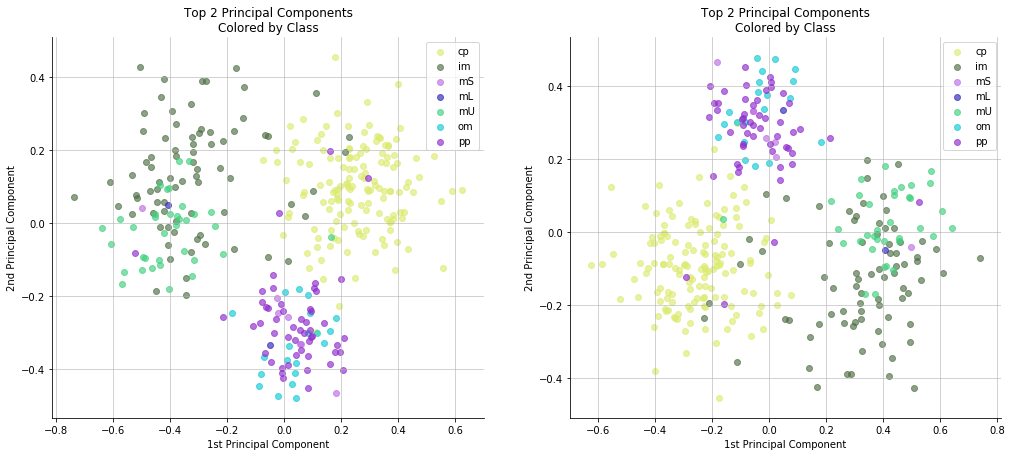

In [30]:
def random_hex(seed):
    np.random.seed(seed)
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(),r(),r())

# map targets to colors randomly
unq_tgts = df.target.unique()
colors = [random_hex(i) for i,cls in zip(range(len(unq_tgts)), unq_tgts)]

# do projection by hand
df_pca = df_0[cols].dot(eigenvectors)[[0, 1]]
df_pca['target'] = df['target']

# plot the first two PCs
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

ax = axes[0]
i = 0
for target, _df in df_pca.groupby('target'):
    color = colors[i]
    label = unq_tgts[i]
    ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
    i += 1
ax.grid(alpha=.7)
sns.despine()
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.legend(loc='best')
ax.set_title('Top 2 Principal Components\nColored by Class')

# perform PCA using sklearn
pca = PCA(n_components=2, random_state=77)
pca.fit(df[cols])
df_pca = pd.DataFrame(pca.transform(df[cols]))

# add target for plotting
df_pca['target'] = df['target']

# plot the first two PCs
ax = axes[1]
i = 0
for target, _df in df_pca.groupby('target'):
    color = colors[i]
    label = unq_tgts[i]
    ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
    i += 1
ax.grid(alpha=.7)
sns.despine()
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.legend(loc='best')
ax.set_title('Top 2 Principal Components\nColored by Class')
plt.show()

### Problem 2f (10 points)

The PCA that you have just completed takes each data point and projects it using a weighted sum of features.  One could also do the opposite to map the features as a weighted sum of the data entries.  How could this be done?  What is a potential issue? Describe these in a few sentences (do not code it).

### Problem 3  MDS  (10 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm.  

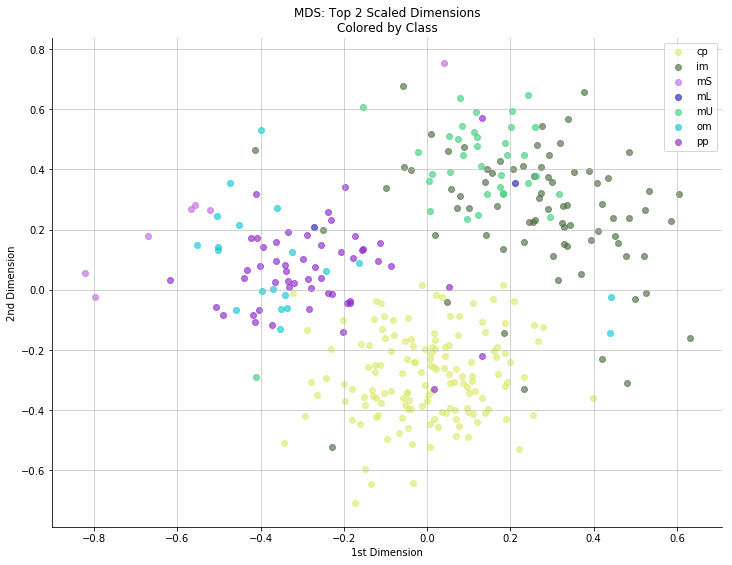

In [37]:
# perform PCA using sklearn
mds = MDS(n_components=2, random_state=77)
df_mds = pd.DataFrame(mds.fit_transform(df[cols]))

# add target for plotting
df_mds['target'] = df['target']

# plot the first two PCs
fig, ax = plt.subplots(figsize=(12, 9))
i = 0
for target, _df in df_mds.groupby('target'):
    color = colors[i]
    label = unq_tgts[i]
    ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
    i += 1
ax.grid(alpha=.7)
sns.despine()
ax.set_xlabel('1st Dimension')
ax.set_ylabel('2nd Dimension')
ax.legend(loc='best')
ax.set_title('MDS: Top 2 Scaled Dimensions\nColored by Class')
plt.show()

### Problem 4a  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

Runtime: 5.08 seconds


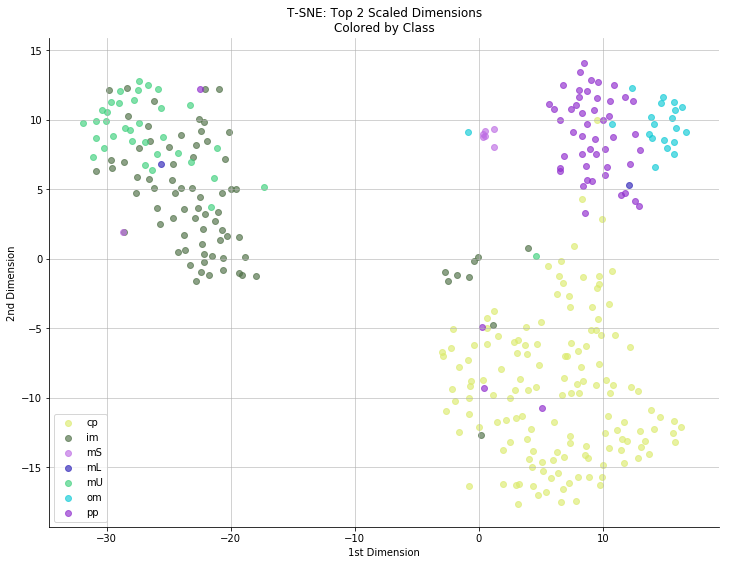

In [33]:
@timing_function
def plot_tsne(df, cols, perplexity=30, ax=None, title=None, method='barnes_hut', random_state=77):
    '''
    DataFrame must have target column.  Value for perplexity 
    defaults to that for sklearn's API. Parameter `cols` must
    be numeric names of DataFrame `df`.  
    '''
    # perform TSNE using sklearn
    tsne = TSNE(n_components=2, 
                random_state=random_state, 
                perplexity=perplexity, 
                method=method)
    df_tsne = pd.DataFrame(tsne.fit_transform(df[cols]))

    # add target for plotting
    df_tsne['target'] = df['target']

    # plot the first two vectors
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 9))
    i = 0
    for target, _df in df_tsne.groupby('target'):
        color = colors[i]
        label = unq_tgts[i]
        ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
        i += 1
    ax.grid(alpha=.7)
    sns.despine()
    ax.set_xlabel('1st Dimension')
    ax.set_ylabel('2nd Dimension')
    ax.legend(loc='best')
    if title is None:
        ax.set_title('T-SNE: Top 2 Scaled Dimensions\nColored by Class')
    else:
        ax.set_title(title)
    if ax is None: 
        plt.show()
    
plot_tsne(df, cols, perplexity=30)

### Problem 4b t-SNE perplexity  (5 points)

Try out a few t-SNE plots by varying the perplexity.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  Report the average calculation time for the t-SNE projection over a number of iterations.

Running t-SNE @perplexity = 2 
Runtime: 2.47 seconds

Running t-SNE @perplexity = 4 
Runtime: 2.54 seconds

Running t-SNE @perplexity = 8 
Runtime: 3.19 seconds

Running t-SNE @perplexity = 16 
Runtime: 4.11 seconds

Running t-SNE @perplexity = 32 
Runtime: 5.63 seconds

Running t-SNE @perplexity = 64 
Runtime: 7.26 seconds

Running t-SNE @perplexity = 128 
Runtime: 9.84 seconds

Running t-SNE @perplexity = 256 
Runtime: 10.47 seconds

Running t-SNE @perplexity = 512 
Runtime: 6.29 seconds

Running t-SNE @perplexity = 1024 
Runtime: 6.05 seconds



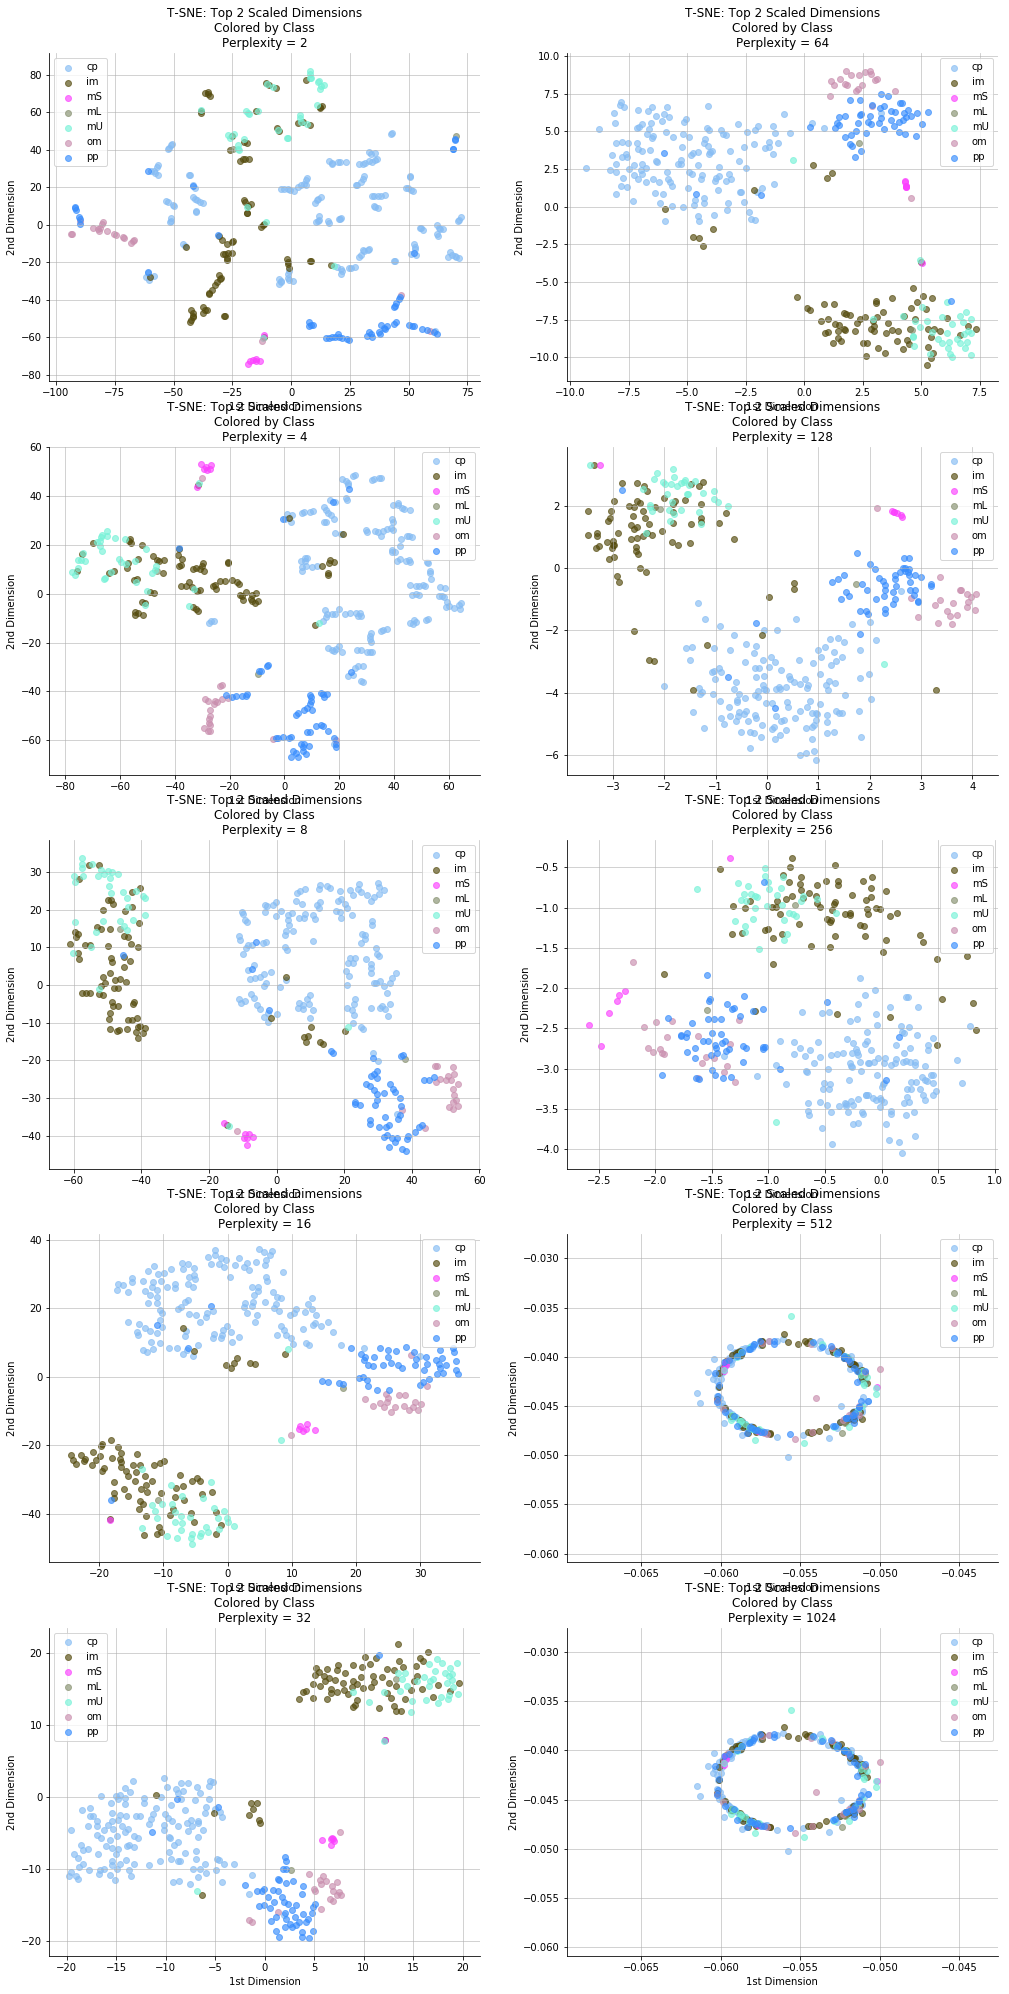

In [25]:
# use %timemit
perplexities = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
nrows = len(perplexities)//2
height = 7*nrows
fig, axes = plt.subplots(nrows, 2, figsize=(17, height))
for p, perplexity in enumerate(perplexities):
    title = 'T-SNE: Top 2 Scaled Dimensions Colored by Class\nPerplexity = {}'.format(perplexity)
    if p < nrows:
        ax = axes[p][0]
    else:
        ax = axes[p-nrows][1]
    print('Running t-SNE @perplexity = %i ' %perplexity)
    plot_tsne(df, cols, perplexity=perplexity, ax=ax, title=title)
    print('')
plt.show()

### Problem 4c  t-SNE randomization (10 points)

The S of t-SNE means stochastic or random, usually as a function of time.  Explore whether you can reproduce the result in 4b through a second projection and plot.

Running t-SNE @perplexity = 30 
Runtime: 4.87 seconds

Running t-SNE @perplexity = 30 
Runtime: 4.76 seconds

Running t-SNE @perplexity = 30 
Runtime: 4.72 seconds

Running t-SNE @perplexity = 30 
Runtime: 4.83 seconds



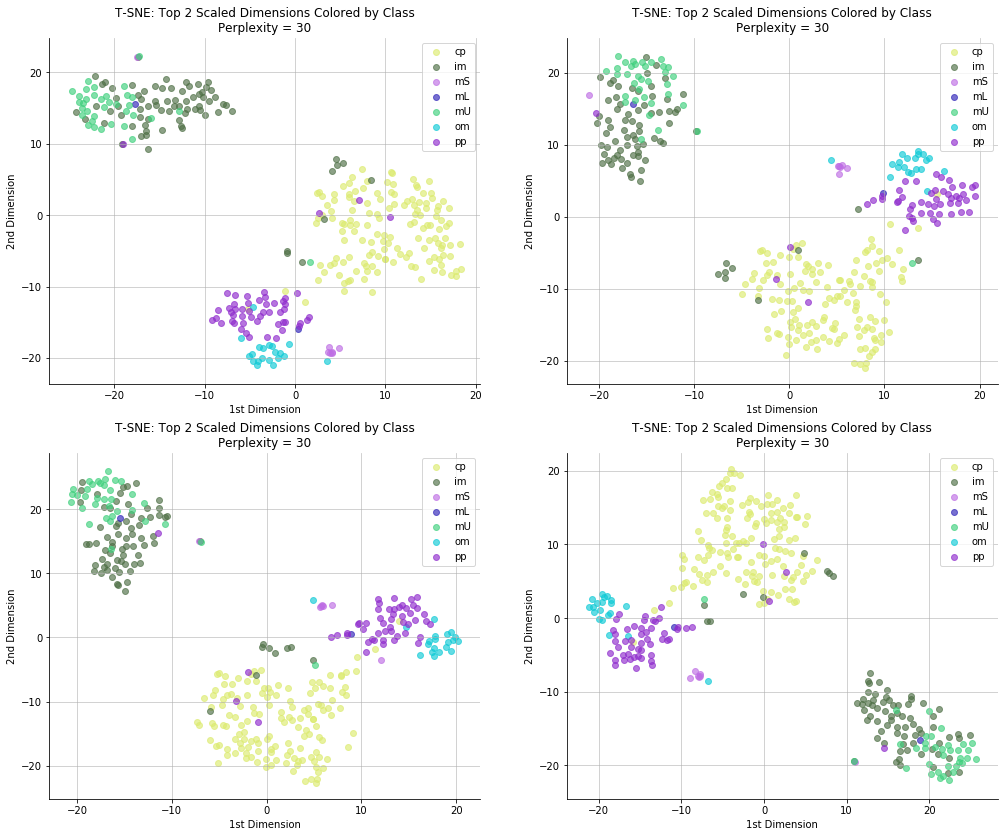

In [36]:
perplexities = [30 for i in range(4)] # use default 4 separate times
nrows = len(perplexities)//2
height = 7*nrows
fig, axes = plt.subplots(nrows, 2, figsize=(17, height))
for p, perplexity in enumerate(perplexities):
    title = 'T-SNE: Top 2 Scaled Dimensions Colored by Class\nPerplexity = {}'.format(perplexity)
    if p < nrows:
        ax = axes[p][0]
    else:
        ax = axes[p-nrows][1]
    print('Running t-SNE @perplexity = %i ' %perplexity)
    np.random.seed(p)
    plot_tsne(df, cols, perplexity=perplexity, ax=ax, title=title, random_state=p)
    print('')
plt.show()

### Problem 4d t-SNE Barnes-Hut  (5 points)

The default t-SNE method of 4b uses the Barnes-Hut approximation.  Keeping the other parameters the same as 4b, plot the t-SNE result using the exact method.  Which method do you prefer?  Compare the average calculation time for the exact method over a number of iterations.

Running t-SNE @method = barnes_hut 
Runtime: 5.18 seconds

Running t-SNE @method = exact 
Runtime: 3.54 seconds



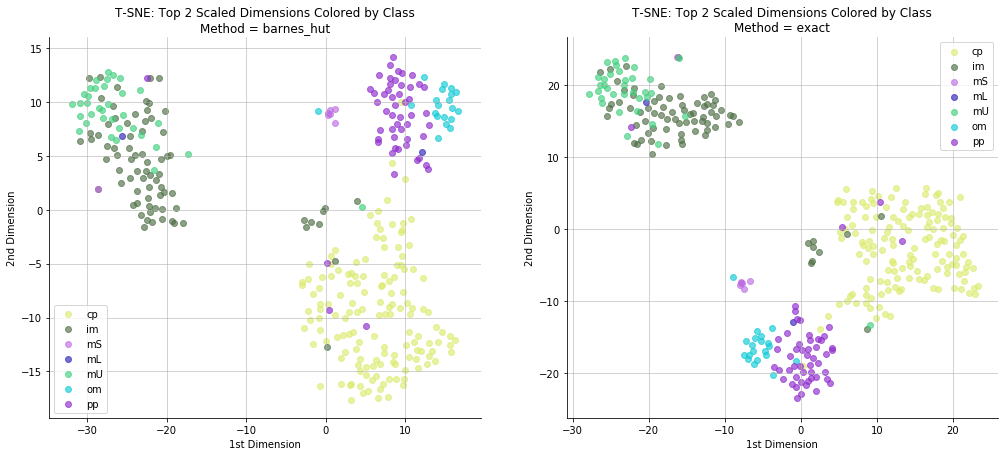

In [35]:
perplexities = [30 for i in range(2)] # use default 2 separate times
methods = ['barnes_hut', 'exact']
fig, axes = plt.subplots(1, 2, figsize=(17, 7))
for p, perplexity in enumerate(perplexities):
    title = 'T-SNE: Top 2 Scaled Dimensions Colored by Class\nMethod = {}'.format(methods[p])
    ax = axes[p]
    print('Running t-SNE @method = %s ' %methods[p])
    plot_tsne(df, cols, perplexity=perplexity, ax=ax, title=title, method=methods[p])
    print('')
plt.show()

### How many hours did this homework take?  

This will not affect your grade.  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

**First pass, roughly 4 hours.  Making sure all is good for submission, roughly 8 hours.**

### Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.